In [52]:
import cellhint
import celltypist
import cellxgene_census
census = cellxgene_census.open_soma(census_version = "latest")
import gget
import scanpy as sc

gget.setup("cellxgene")

# Uncomment the following line to see the documentation
help(gget.cellxgene)

Installing cellxgene-census package (requires pip).
cellxgene_census installed succesfully.


Help on function cellxgene in module gget.gget_cellxgene:

cellxgene(species='homo_sapiens', gene=None, ensembl=False, column_names=['dataset_id', 'assay', 'suspension_type', 'sex', 'tissue_general', 'tissue', 'cell_type'], meta_only=False, tissue=None, cell_type=None, development_stage=None, disease=None, sex=None, is_primary_data=True, dataset_id=None, tissue_general_ontology_term_id=None, tissue_general=None, assay_ontology_term_id=None, assay=None, cell_type_ontology_term_id=None, development_stage_ontology_term_id=None, disease_ontology_term_id=None, donor_id=None, self_reported_ethnicity_ontology_term_id=None, self_reported_ethnicity=None, sex_ontology_term_id=None, suspension_type=None, tissue_ontology_term_id=None, census_version='stable', verbose=True, out=None)
    Query data from CZ CELLxGENE Discover (https://cellxgene.cziscience.com/) using the
    CZ CELLxGENE Discover Census (https://github.com/chanzuckerberg/cellxgene-census).

    NOTE: Querying large datasets requires

In [28]:
'''
Query the cellxgene database for all Mus musculus cells with the following filters:
Filters:
species: Mus musculus
disease: normal
tissue_general: kidney

> Query Time:
'''

adata = gget.cellxgene(
species="mus_musculus",
tissue_general="kidney",
disease="normal",
meta_only=False,
verbose=True,
is_primary_data=True,
out="Mm_gget_kidney.h5ad",
)

Fetching AnnData object from CZ CELLxGENE Discover. This might take a few minutes...
The "stable" release is currently 2025-01-30. Specify 'census_version="2025-01-30"' in future calls to open_soma() to ensure data consistency.
The "stable" release is currently 2025-01-30. Specify 'census_version="2025-01-30"' in future calls to open_soma() to ensure data consistency.
... storing 'feature_type' as categorical


In [53]:
adata = sc.read('/Users/aumchampaneri/PycharmProjects/Biochemistry-BS/Human Kidney Atlas/Mm_gget_kidney.h5ad')

In [54]:
adata

AnnData object with n_obs × n_vars = 186115 × 52483
    obs: 'dataset_id', 'assay', 'suspension_type', 'sex', 'tissue_general', 'tissue', 'cell_type', 'is_primary_data', 'disease'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_type', 'feature_length', 'nnz', 'n_measured_obs'

In [55]:
adata.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 273599576 stored elements and shape (186115, 52483)>

In [80]:
adata_0 = sc.read_h5ad('/Users/aumchampaneri/Downloads/a8debecc-5247-45fa-8cdb-1b6b36a4670b.h5ad')
adata_1 = sc.read_h5ad('/Users/aumchampaneri/Downloads/22a77471-506b-43b0-899f-c00bb123d34e.h5ad')
adata_2 = sc.read_h5ad('/Users/aumchampaneri/Downloads/c9f26c31-4967-4fda-9b17-a0bb0dde1940.h5ad')

# Concatenate the datasets
adata = adata_0.concatenate(adata_1, adata_2)

In [82]:
adata

AnnData object with n_obs × n_vars = 164881 × 12092
    obs: 'Origin', 'suspension_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'author_cell_type', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'development_stage_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'donor_id', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'age', 'cell', 'free_annotation', 'method', 'subtissue', 'n_counts', 'louvain', 'leiden', 'FACS.selection', 'batch'
    var: 'feature_is_filtered', 'feature_reference', 'feature_bi

In [83]:
del adata.var
del adata.uns
del adata.obsm
adata

AnnData object with n_obs × n_vars = 164881 × 12092
    obs: 'Origin', 'suspension_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'author_cell_type', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'development_stage_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'donor_id', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'age', 'cell', 'free_annotation', 'method', 'subtissue', 'n_counts', 'louvain', 'leiden', 'FACS.selection', 'batch'

In [84]:
# Basic filtering
# Filter out cells that express fewer than 500 genes to remove low-quality cells, empty droplets, and debris.
sc.pp.filter_cells(adata, min_genes=500, inplace=True)
# Filter out genes that are detected in fewer than 3 cells to eliminate technical noise and very rarely expressed genes.
sc.pp.filter_genes(adata, min_cells=3, inplace=True)

sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, batch_key = 'Origin', subset = True)
sc.pp.scale(adata, max_value = 10)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

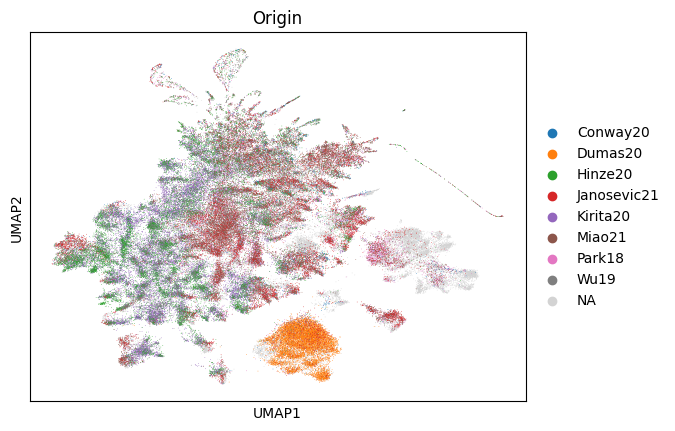

In [94]:
sc.pp.combat(adata)
sc.pl.umap(adata, color = 'Origin')

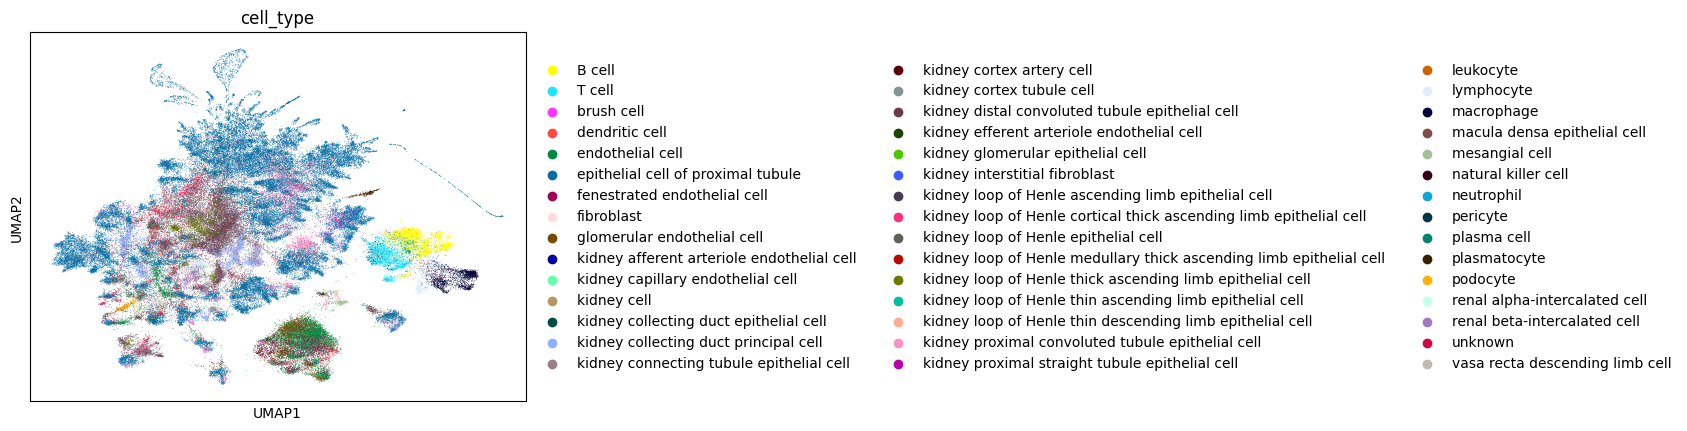

In [107]:

sc.pl.umap(adata, color = 'cell_type')

In [ ]:
import numpy as np
import colorcet as cc
import matplotlib.pyplot as plt

xs, _ = np.meshgrid(np.linspace(0, 1, 80), np.linspace(0, 1, 10))
plt.imshow(xs, cmap=cc.cm.colorwheel);  # use tab completion to choose

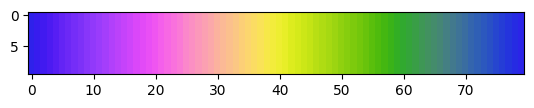

In [70]:
alignment = cellhint.harmonize(adata, 'Origin', 'cell_type', use_pct=True)

👀 Detected PCA coordinates in the object, will use these to calculate distances
🏆 Reordering datasets
🖇 Harmonizing cell types of Park18 and nan
🖇 Harmonizing cell types of Conway20
🖇 Harmonizing cell types of Hinze20
🖇 Harmonizing cell types of Miao21
🖇 Harmonizing cell types of Kirita20
🖇 Harmonizing cell types of Wu19
🖇 Harmonizing cell types of Janosevic21
🖇 Harmonizing cell types of Dumas20
🖋️ Reannotating cells
✅ Harmonization done!


In [ ]:
alignment

In [73]:
alignment.write('Mm_kidney_alignment.pkl')

In [76]:
alignment = cellhint.DistanceAlignment.load('/Users/aumchampaneri/PycharmProjects/Biochemistry-BS/Human Kidney Atlas/Mm_kidney_alignment.pkl')

In [ ]:
# Note - `alignment.relation` is simply a Pandas data frame.
# Show the top 10 rows of the table.
alignment.relation.head(10)

,Park18,relation,nan,relation,Conway20,relation,Hinze20,relation,Miao21,relation,Kirita20,relation,Wu19,relation,Janosevic21,relation,Dumas20
0,B cell,=,B cell,∈,B cell,=,NONE,=,UNRESOLVED,=,NONE,=,NONE,=,NONE,=,NONE
1,NONE,=,NONE,=,NONE,=,NONE,=,B cell,=,UNRESOLVED,=,NONE,=,NONE,=,NONE
2,NONE,=,NONE,=,NONE,=,NONE,=,NONE,=,kidney loop of Henle thin ascending limb epith...,=,NONE,=,NONE,=,NONE
3,NONE,=,NONE,=,NONE,=,macula densa epithelial cell,=,UNRESOLVED,=,NONE,=,NONE,=,NONE,=,NONE
4,NONE,=,NONE,=,kidney collecting duct epithelial cell,=,NONE,=,NONE,=,NONE,=,NONE,=,NONE,=,NONE
5,NONE,=,brush cell,=,NONE,=,UNRESOLVED,=,UNRESOLVED,=,UNRESOLVED,=,NONE,=,NONE,=,NONE
6,NONE,=,fenestrated endothelial cell,∈,vasa recta descending limb cell,=,NONE,=,NONE,=,NONE,=,NONE,=,NONE,=,NONE
7,NONE,=,fibroblast,=,NONE,=,NONE,=,NONE,=,NONE,=,NONE,=,NONE,=,NONE
8,NONE,=,kidney loop of Henle thick ascending limb epit...,=,UNRESOLVED,=,NONE,=,NONE,=,NONE,=,NONE,=,NONE,=,NONE
9,NONE,=,kidney proximal convoluted tubule epithelial cell,=,NONE,=,NONE,=,UNRESOLVED,=,NONE,=,NONE,=,NONE,=,NONE
